In [2]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import matplotlib.patches

from math import inf, pi
from itertools import product, combinations

%matplotlib inline

In [175]:
def side_of_line(pa, pb, p):
    '''returns -1 if p is in left half-plane determined 
       by points pa and pb, +1 if in right half-plane'''
    
    rhs = p[1] - pa[1] * (pb[0] - pa[0]) * (p[0] - pa[0])
    lhs = (pb[1] - pa[1])
    return np.sign(rhs - lhs)

In [177]:
def exists_separating_hyperplane(tri1, tri2):
    '''tri1 and tri2 are 2 x 3 and denote the vertices of two triangles'''
    
    for i in range(3):
        pa, pb = [tri1[:, j] for j in range(3) if i != j]
        side_1 = side_of_line(pa, pb, tri1[:, i])
        sides_2 = [side_of_line(pa, pb, tri2[:, j]) for j in range(3)]
        signs_differ = [side_1 != side_2 for side_2 in sides_2]
        if all(signs_differ): return True
    return False

In [178]:
def intersect(tri1, tri2):
    '''tri1 and tri2 intersect if cannot find separating hyperplane'''
    b1 = exists_separating_hyperplane(tri1, tri2)
    b2 = exists_separating_hyperplane(tri2, tri1)
    return not (b1 or b2)

In [114]:
def collision_check():
    pass

In [116]:
def compute_configuration_space(piano, grid):
    '''sweeps through grid checking for triangle intersections'''
    
    configuration_space = np.zeros_like(grid)
    for x in np.arange(0, 10, 0.1):
        for y in np.arange(0, 10, 0.1):
            for theta in np.arange(0, 2*pi, 0.05):
                if False:
                    configuration_space[x, y, theta] = collision_check()
    
    return configuration_space

In [117]:
def make_piano(offset):
    vertices = np.array([[0.0, 0.0], [0.0, 2.0], [0.5, 2.2], 
        [1.0, 2.0], [1.2, 1.2], [1.5, 1.0], [1.5, 0.0]])
    xy = vertices + offset
    piano = matplotlib.patches.Polygon(xy=xy)
    return piano

In [118]:
def make_obstacles():
    wall_1 = matplotlib.patches.Rectangle(xy=(5, 0), angle=0, height=2, width=0.2)
    wall_2 = matplotlib.patches.Rectangle(xy=(5, 5), angle=0, height=2, width=0.2)
    obstacles = [wall_1, wall_2]
    return obstacles

In [179]:
def plot_world(patches, goal=(8, 2)):
    fig, ax = plt.subplots()
    for patch in patches:
        ax.add_patch(patch)
        ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.scatter(goal[0], goal[1])
    plt.show()
    return ax

In [120]:
def create_triangle(pose, r=0.1):
    xy = pose[:2] 
    theta = pose[2] - pi / 2
    kwargs = dict(xy=xy, numVertices=3, radius=r, orientation=theta)
    return RegularPolygon(**kwargs)

In [186]:
def demo_triangle_intersection(positive_case=True):
    tri1 = np.array([[3, 1, 4], [3, 4, 1]])
    if positive_case: tri2 = np.array([[0, 0, 4], [0, 1, 2]])
    else: tri2 = np.array([[0, 0, 2], [0, 1, 2]])
        
    verb = 'do' if intersect(tri1, tri2) else 'do not'
    s = 'tri1 and tri2 {} intersect'.format(verb)

    fig, ax = plt.subplots()
    for tri in (tri1, tri2):
        ax.add_patch(matplotlib.patches.Polygon(xy=tri.T))
        
    ax.set_xlim([-5, 5])
    ax.set_ylim([-5, 5])
    fig.suptitle(s)

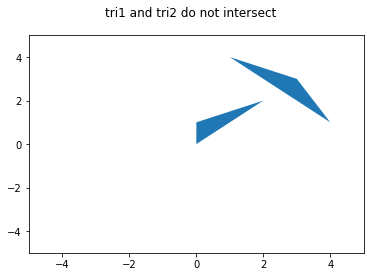

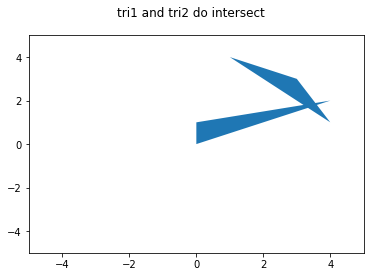

In [187]:
demo_triangle_intersection(positive_case=False)
demo_triangle_intersection(positive_case=True)

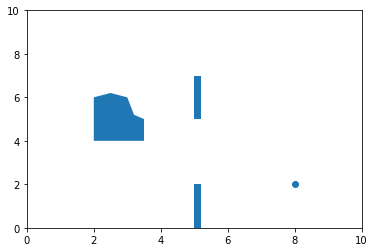

In [102]:
piano = make_piano(offset=np.array([2, 4]))
obstacles = make_obstacles()

patches = [piano] + obstacles
ax = plot_world(patches)

In [99]:
def main():
    pass

In [ ]:
if __name__ == '__main__':
    main()